# Job Placement Prediction with Logistic Regression

## Overview

Due to the growing need of educated and talented individuals, especially in developing countries, recruiting fresh graduates is a routine practice for organizations. Conventional recruiting methods and selection processes can be prone to errors and in order to optimize the whole process, some innovative methods are needed.


## Logistic Regression

Logistic Regression is a type of statistical model that is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.


## Code

### Importing the libraries

In this section, we will import all the essential libraries that are needed for this project. The most notable ones should be: **numpy**, **pandas**, **seaborn** and **matplotlib**.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

We will be using a dataset from Kaggle by Ahsan Raza called [Job Placement Dataset](https://www.kaggle.com/datasets/ahsan81/job-placement-dataset). This dataset will also be included within the Github folder for your convenience.

In [2]:
job_placement = pd.read_csv('Job_Placement_Data.csv')
job_placement.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [3]:
# Getting the number of rows and columns
job_placement.shape

(215, 13)

In [4]:
# Showing the statistics of numeric variables
job_placement.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [5]:
# Exploring the data type of each column
job_placement.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [6]:
# Checking for empty columns
job_placement.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

Now, we will attempt to explore the relationship between the variables. Since most of our variables here are "categorical" ones, we will have to plot them manually instead of using Correlation.

<AxesSubplot:xlabel='status', ylabel='count'>

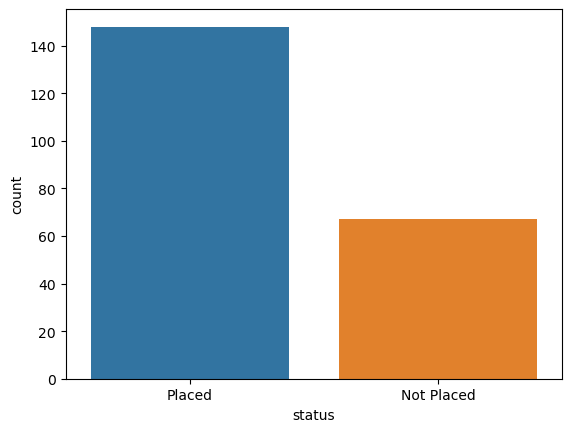

In [7]:
# Checking the overall status
sns.countplot(x="status", data=job_placement)

<AxesSubplot:xlabel='status', ylabel='count'>

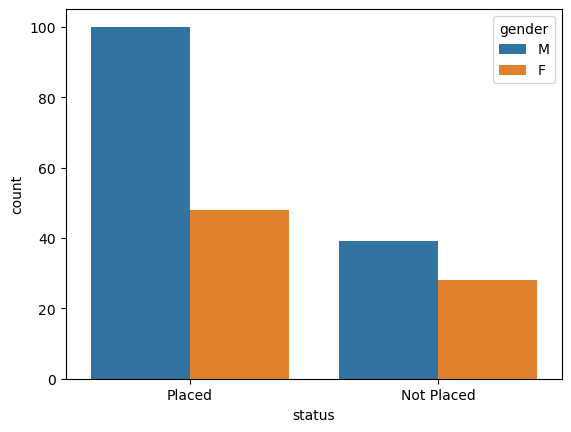

In [8]:
# Checking the status based on gender
sns.countplot(x="status", hue="gender", data=job_placement)

<AxesSubplot:xlabel='status', ylabel='count'>

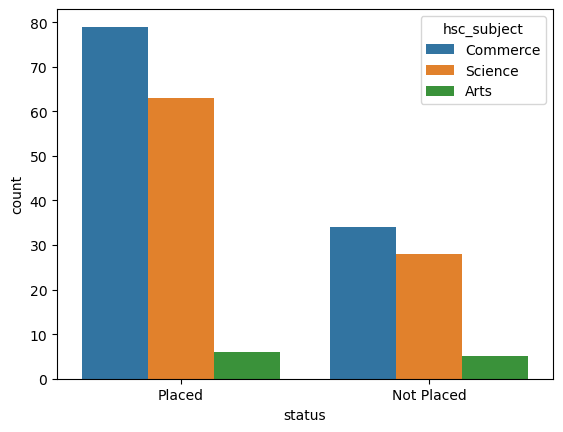

In [9]:
# Checking the status based on high school subject
sns.countplot(x="status", hue="hsc_subject", data=job_placement)

<AxesSubplot:xlabel='status', ylabel='count'>

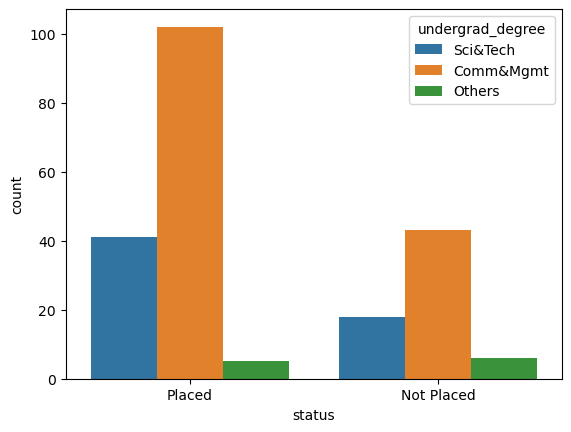

In [10]:
# Checking the status based on undergrad degree
sns.countplot(x="status", hue="undergrad_degree", data=job_placement)

<AxesSubplot:xlabel='status', ylabel='count'>

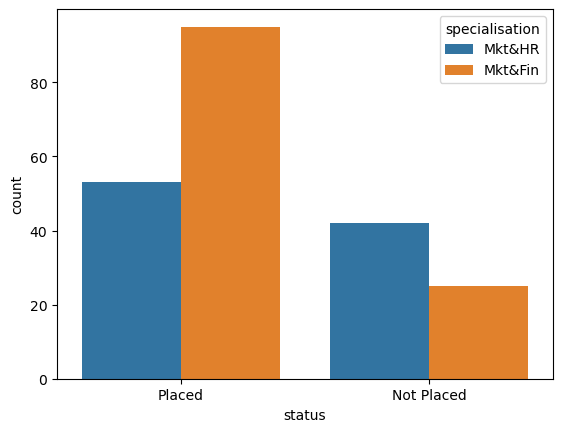

In [11]:
# Checking the status based on specialisation
sns.countplot(x="status", hue="specialisation", data=job_placement)

### Data Modeling

Since most of our data are categorical ones and Logistic Regression does not support categorical variables. We will have to convert them into dummy/indicator variables first.

In [12]:
# Encoding gender column
gender = pd.get_dummies(job_placement['gender'], drop_first=True)
gender.head()

,M
0,1
1,1
2,1
3,1
4,1


In [13]:
# Encoding ssc board column
ssc_board = pd.get_dummies(job_placement['ssc_board'], drop_first=True)
ssc_board.head()

,Others
0,1
1,0
2,0
3,0
4,0


In [14]:
#Encoding hsc board column
hsc_board = pd.get_dummies(job_placement['hsc_board'], drop_first=True)
hsc_board.head()

,Others
0,1
1,1
2,0
3,0
4,0


In [15]:
# Encoding hsc_subject column
hsc_subject = pd.get_dummies(job_placement['hsc_subject'])
hsc_subject.head()

,Arts,Commerce,Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [16]:
#Encoding undergrad_degree column
undergrad_degree = pd.get_dummies(job_placement['undergrad_degree'])
undergrad_degree.head()

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [17]:
# Encoding work_experience column
work_experience = pd.get_dummies(job_placement['work_experience'], drop_first = True)
work_experience.head()

,Yes
0,0
1,1
2,0
3,0
4,0


In [18]:
# Encoding specialisation column
specialisation = pd.get_dummies(job_placement['specialisation'], drop_first = True)
specialisation.head()

,Mkt&HR
0,1
1,0
2,0
3,1
4,0


In [19]:
# Finally, we are going to encode the status column
status = pd.get_dummies(job_placement['status'], drop_first = True)
status.head()

,Placed
0,1
1,1
2,1
3,0
4,1


After encoding all the categorical columns, we are now going to merge them with the main data frame. Then, we will go on to remove the categorical variables from the main data frame as well.

In [20]:
# Merging our main data frame with the dummy data frames
pd.set_option('display.max_columns', None)
job_placement = pd.concat([job_placement, gender, ssc_board, hsc_board, hsc_subject, undergrad_degree, work_experience, specialisation, status], axis=1)
job_placement.head(20)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status,M,Others,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,Yes,Mkt&HR,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,1,1,1,0,1,0,0,0,1,0,1,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,1,0,1,0,0,1,0,0,1,1,0,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,1,0,0,1,0,0,1,0,0,0,0,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,1,0,0,0,0,1,0,0,1,0,1,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,1,0,0,0,1,0,1,0,0,0,0,1
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,1,1,1,0,0,1,0,0,1,1,0,0
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0,1,1,0,1,0,1,0,0,0,0,0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,1,0,0,0,0,1,0,0,1,1,0,1
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,1,0,0,0,1,0,1,0,0,0,0,1
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,1,0,0,0,1,0,1,0,0,0,0,0


In [21]:
# Dropping the columns with categorical value from our main data frame
job_placement.drop(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'], axis=1, inplace=True)

In [22]:
# Displaying the end result after dropping
job_placement.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,M,Others,Others,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech,Yes,Mkt&HR,Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,0,1,0,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,1,0,0,1,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,0,1,0,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,0,1,0,1,0,0,0,0,1


### Training our model

In [23]:
# Splitting our data frame into independent and dependent variables
X = job_placement.drop("Placed", axis=1)
y = job_placement["Placed"]

In [24]:
# Splitting our data frame into training set (80%) and testing set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
# Fitting the data frame as well as training series into our Logistic Regression model
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter=1000)
regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluating the model

In this section, we will attempt to explore the accuracy of our trained model by using our test data frame and series.

In [26]:
# Using our trained Logistic Regression model to predict the job placement status
predictions = regression.predict(X_test)

In [27]:
# Using confusion matrix to compare our result
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[13,  2],
       [ 2, 26]], dtype=int64)

In [28]:
# Using accuracy_score to get how accurate our logistic regression model is
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9069767441860465

We can see that our Logistic Regression model was able to correctly guess the job placement status with an accuracy of about **90.7%**.

## Conclusion

Overall, this project demonstrates the ability of logistic regression model to solve classification problem such as this job placement problem and it serves as a purpose for the author to further enhance their familiarity with machine learning in general.